In [134]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [136]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')

In [137]:
gdp_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN
...,...,...,...,...
7657,Zimbabwe,1994,2670.106615,NaN
7658,Zimbabwe,1993,2458.783255,NaN
7659,Zimbabwe,1992,2468.278257,NaN
7660,Zimbabwe,1991,2781.787843,NaN


5. How many rows and columns are in `gdp_df`? What are the data types of each column?

In [139]:
gdp_df.info

<bound method DataFrame.info of      Country or Area  Year        Value  Value Footnotes
0        Afghanistan  2021  1517.016266              NaN
1        Afghanistan  2020  1968.341002              NaN
2        Afghanistan  2019  2079.921861              NaN
3        Afghanistan  2018  2060.698973              NaN
4        Afghanistan  2017  2096.093111              NaN
...              ...   ...          ...              ...
7657        Zimbabwe  1994  2670.106615              NaN
7658        Zimbabwe  1993  2458.783255              NaN
7659        Zimbabwe  1992  2468.278257              NaN
7660        Zimbabwe  1991  2781.787843              NaN
7661        Zimbabwe  1990  2704.757299              NaN

[7662 rows x 4 columns]>

6. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [141]:
gdp_df.columns = ['Country', 'Year', 'GDP_Per_Capita', 'vf']

In [142]:
gdp_df.drop = ['vf']

In [143]:
gdp_df.head

<bound method NDFrame.head of           Country  Year  GDP_Per_Capita  vf
0     Afghanistan  2021     1517.016266 NaN
1     Afghanistan  2020     1968.341002 NaN
2     Afghanistan  2019     2079.921861 NaN
3     Afghanistan  2018     2060.698973 NaN
4     Afghanistan  2017     2096.093111 NaN
...           ...   ...             ...  ..
7657     Zimbabwe  1994     2670.106615 NaN
7658     Zimbabwe  1993     2458.783255 NaN
7659     Zimbabwe  1992     2468.278257 NaN
7660     Zimbabwe  1991     2781.787843 NaN
7661     Zimbabwe  1990     2704.757299 NaN

[7662 rows x 4 columns]>

7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice? 

In [145]:
print(gdp_df)

          Country  Year  GDP_Per_Capita  vf
0     Afghanistan  2021     1517.016266 NaN
1     Afghanistan  2020     1968.341002 NaN
2     Afghanistan  2019     2079.921861 NaN
3     Afghanistan  2018     2060.698973 NaN
4     Afghanistan  2017     2096.093111 NaN
...           ...   ...             ...  ..
7657     Zimbabwe  1994     2670.106615 NaN
7658     Zimbabwe  1993     2458.783255 NaN
7659     Zimbabwe  1992     2468.278257 NaN
7660     Zimbabwe  1991     2781.787843 NaN
7661     Zimbabwe  1990     2704.757299 NaN

[7662 rows x 4 columns]


8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

(array([5.124e+03, 1.053e+03, 8.830e+02, 3.490e+02, 1.270e+02, 6.100e+01,
        3.500e+01, 2.500e+01, 2.000e+00, 3.000e+00]),
 array([   436.37641563,  16152.98702866,  31869.59764169,  47586.20825471,
         63302.81886774,  79019.42948077,  94736.04009379, 110452.65070682,
        126169.26131985, 141885.87193287, 157602.4825459 ]),
 <BarContainer object of 10 artists>)

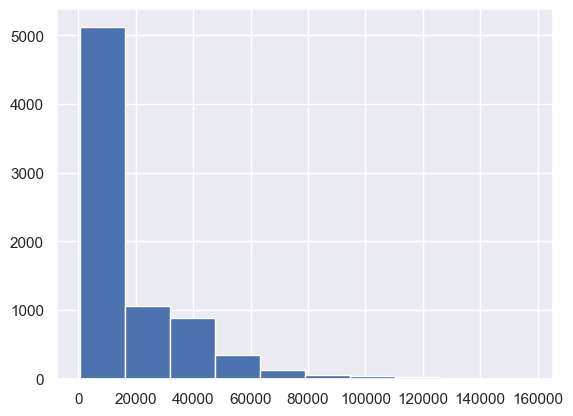

In [147]:
# histogram
plt.hist(gdp_df.GDP_Per_Capita)

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

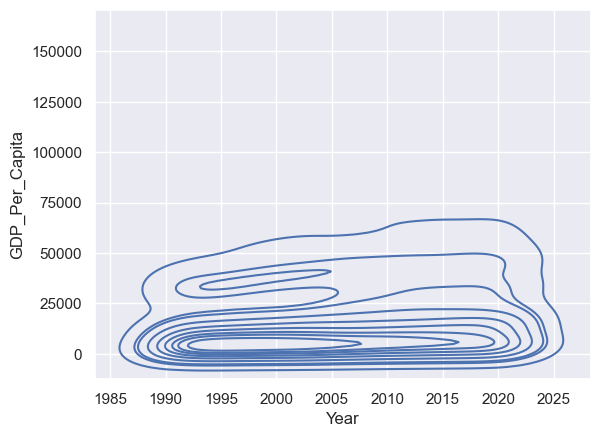

In [148]:
# density plot is easiest in seaborn
sns.kdeplot(data=gdp_df, x='Year', y='GDP_Per_Capita')

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

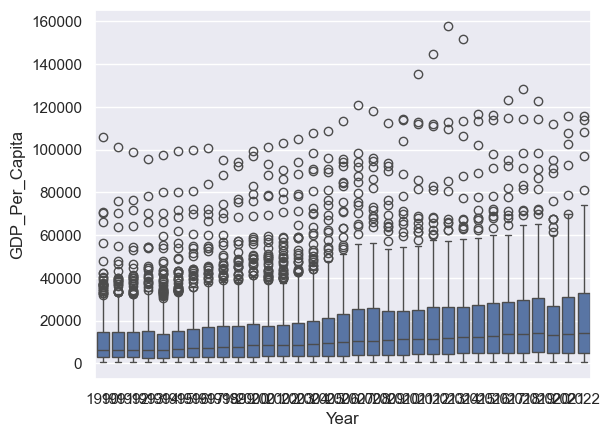

In [149]:
# box plot
sns.boxplot(x=gdp_df['Year'], y=gdp_df['GDP_Per_Capita'])

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

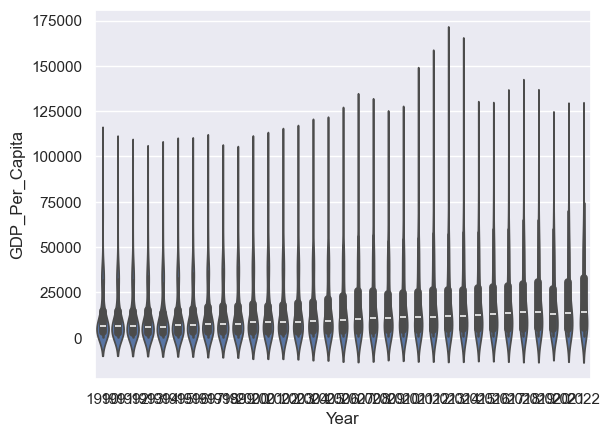

In [150]:
#violin plot
sns.violinplot(x=gdp_df['Year'], y=gdp_df['GDP_Per_Capita'])

9. What was the median GDP per capita value in 2020?

In [152]:
gdp2020 = gdp_df[gdp_df['Year']==2020]

In [153]:
medgdp2020 = gdp2020['GDP_Per_Capita']

In [154]:
print(np.median(medgdp2020))

13357.997573370474


10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
	* A boxplot
	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
	* A scatterplot
	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)  

In [156]:
gdp_decades = gdp_df[gdp_df['Year'].isin([1990, 2000, 2010, 2020])]


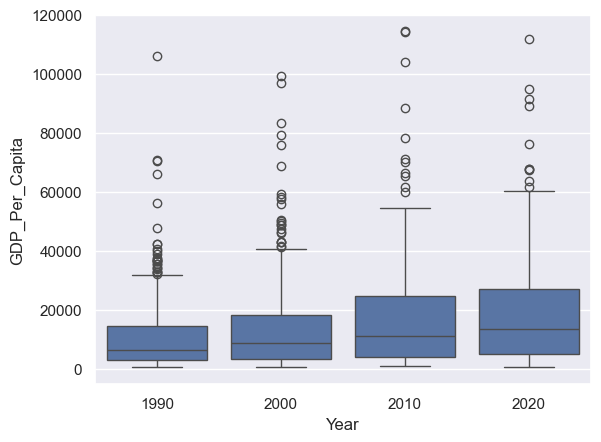

In [157]:
sns.boxplot(x=gdp_decades['Year'], y=gdp_decades['GDP_Per_Capita'])
plt.show()

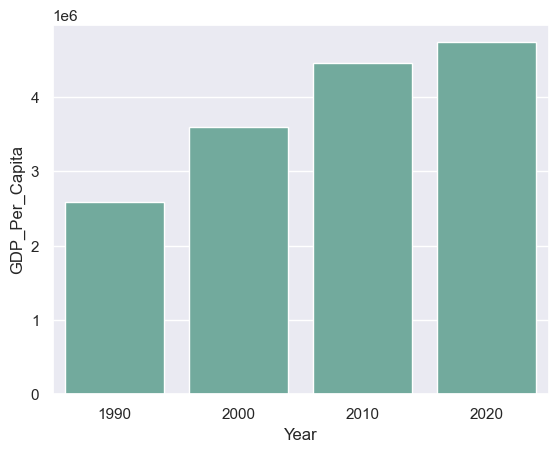

In [158]:
sns.set_theme(style="darkgrid")
sns.barplot(x="Year",
            y="GDP_Per_Capita",
            data=gdp_decades,
            estimator=sum,
            errorbar=None,
            color='#69b3a2');

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

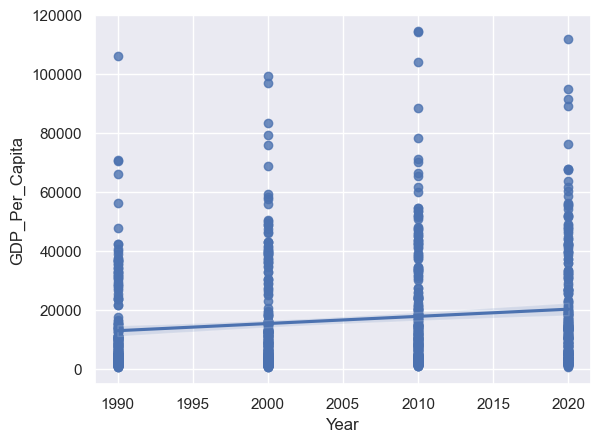

In [159]:
sns.regplot(x=gdp_decades["Year"],y=gdp_decades["GDP_Per_Capita"])

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

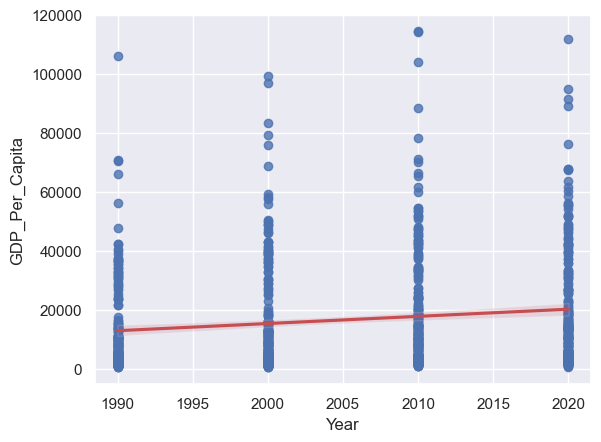

In [160]:
sns.regplot(x=gdp_decades["Year"],
            y=gdp_decades["GDP_Per_Capita"],
            line_kws={"color": "r"})

11. Which country was the first to have a GDP per capita greater than $100,000?

In [179]:
gdp_greater=gdp_df[gdp_df['GDP_Per_Capita']>=100000].sort_values('Year')

In [181]:
gdp_greater.head(1)

,Country,Year,GDP_Per_Capita,vf
7302,United Arab Emirates,1990,105893.626059,NaN


12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

In [189]:
gdp_df2020=gdp_df[gdp_df['Year']==2020].sort_values('GDP_Per_Capita', ascending=False)
gdp_df2020.head(1)

,Country,Year,GDP_Per_Capita,vf
4148,Luxembourg,2020,111751.314751,NaN


<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

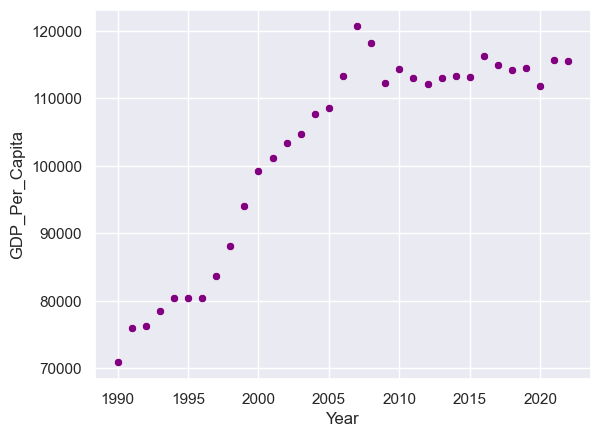

In [195]:
gdp_lux=gdp_df[gdp_df['Country']=='Luxembourg'].sort_values('GDP_Per_Capita')

sns.scatterplot(
    data=gdp_lux,
    x='Year',
    y='GDP_Per_Capita',
    color='purple')

13. Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. **Bonus question:** Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?

14. Read in the internet use dataset into a DataFrame named `internet_df`. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.

In [ ]:
internet_df = pd.read_csv('../data/internet_use.csv', nrows = 6083)

15. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.

16. Look at the number of observations in this dataset per year. What do you notice?


17. What is the first year to have a non-zero internet users percentage value?

18. How does the distribution of internet users percent differ for 2000 and 2014?

19. For how many countries was the percentage of internet users below 5% in 2014?

20. Merge the two DataFrames to one. Do this in a way that keeps **all rows** from each of the two DataFrames. Call the new DataFrame `gdp_and_internet_use`. Look at the first and last few rows to confirm that it merged correctly.

21. Find the three countries with the highest internet users percentage in 2014. Use a seaborn FacetGrid (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) to compare how the GDP per capita has changed over time for these three countries. What do you notice?


22. Subset `gdp_and_internet_use` to just the year 2014. Save this as a new dataframe named `gdp_and_internet_use_2014`.

23. Create a plot which compares Internet Users Percentage and GDP per Capita for the year 2014. What do you notice from this plot? If you see any unusual points, investigate them.

24. **Stretch Question:** Use the `qcut` function from pandas (https://pandas.pydata.org/docs/reference/api/pandas.qcut.html) to divide countries in `gdp_per_capita_2014` into three groups based on their GDP per capita values. Label these groups as "Low", "Medium", and "High". Put these labels in a new column, named "GDP_group".

25. **Stretch Question:** How does the median internet users percentage compare for the three gdp groups?

1.    Download another data set from the UN data (http://data.un.org/Explorer.aspx) to merge with your data and explore.